# Условие задачи

<img src = "./images/condition.png" width = "300" height = "125" align = "center"/>

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
B_GLOBAL = 1.5

In [37]:
# (y_1', y_2') = f(y_1, y_2)
def Brusselator(t, y, A = 1.0, B = B_GLOBAL):
  f = np.array([1.0, 0.0])
  f[0] = A + y[0] * y[0] * y[1] - (B + 1) * y[0]
  f[1] = B * y[0] - y[0] * y[0] * y[1]
  return f

# Реализация метода Рунге-Кутты

Реализуем классический метод Рунге-Кутты 4-го порядка:

<img src = "./images/RKM4.png" width = "400" height = "225" align = "center"/>

In [38]:
def RungeKuttaIteration_4Order(t_n, y_n, h, f):
  f_1 = f(t_n, y_n, B = B_GLOBAL)
  f_2 = f(t_n + h / 2, y_n + f_1 * h / 2, B = B_GLOBAL)
  f_3 = f(t_n + h / 2, y_n + f_2 * h / 2, B = B_GLOBAL)
  f_4 = f(t_n + h, y_n + f_3 * h, B = B_GLOBAL)

  y_n_1 = y_n + h / 6 * (f_1 + 2 * f_2 + 2 * f_3 + f_4)
  return y_n_1

def BrusselatorSolutionsRK(N = int(1e4), h = 0.01):
  start = np.array([1.0, 1.0])
  t_array = [0.0]
  y_array = [start]

  for i in range(0, N):
    y_new = RungeKuttaIteration_4Order(t_array[i], y_array[i], h, Brusselator)
    y_array.append(y_new)
    t_array.append(h * (i + 1))

  return y_array, t_array

def ShowPlotsRK(u, v, t):
  plt.figure(figsize=[12, 5], dpi=100)
  plt.plot(u, v)
  plt.title("Рунге-Кутта. Фазовый портрет v(u) при B = %.2f" %B_GLOBAL)
  plt.grid()
  plt.show()

  plt.figure(figsize=[12, 5], dpi=100)
  plt.plot(t, u, label = "u")
  plt.plot(t, v, label = "v")
  plt.xlabel("t")
  plt.ylabel("u, v")
  plt.legend()
  plt.title("Рунге-Кутта. u(t) и v(t) при B = %.2f" %B_GLOBAL)
  plt.grid()
  plt.show()

# Реализация метода Адамса

Реализуем многошаговый метод Адамса 4-го порядка:

<img src = "./images/Adams4.png" width = "700" height = "50" align = "center"/>

In [39]:
def AdamsIteration_4Order(t_prev4_arr, y_prev4_arr, h, f):
  y_n_1 = y_prev4_arr[-1] + h * (55/24 * f(t_prev4_arr[-1], y_prev4_arr[-1], B = B_GLOBAL) - 
                                      59/24 * f(t_prev4_arr[-2], y_prev4_arr[-2], B = B_GLOBAL) + 
                                      37/24 * f(t_prev4_arr[-3], y_prev4_arr[-3], B = B_GLOBAL) - 
                                      3/8 * f(t_prev4_arr[-4], y_prev4_arr[-4], B = B_GLOBAL))
  return y_n_1

def BrusselatorSolutionsAdams(t_prev4_arr, y_prev4_arr, N = int(1e4), h = 0.01):
  t_array = t_prev4_arr
  y_array = y_prev4_arr

  for i in range(3, N):
    y_new = AdamsIteration_4Order(t_prev4_arr, y_prev4_arr, h, Brusselator)
    y_array.append(y_new)
    t_array.append(h * (i + 1))

  return y_array, t_array

def ShowPlotsAdams(u, v, t):
  plt.figure(figsize=[12, 5], dpi=100)
  plt.plot(u, v)
  plt.title("Метод Адамса. Фазовый портрет v(u) при B = %.2f" %B_GLOBAL)
  plt.grid()
  plt.show()

  plt.figure(figsize=[12, 5], dpi=100)
  plt.plot(t, u, label = "u")
  plt.plot(t, v, label = "v")
  plt.xlabel("t")
  plt.ylabel("u, v")
  plt.legend()
  plt.title("Матод Адамса. u(t) и v(t) при B = %.2f" %B_GLOBAL)
  plt.grid()
  plt.show()


# Графики

In [40]:
N = 10000
h = 0.01

## Графики для методов Рунге-Кутты

### B = 1.5

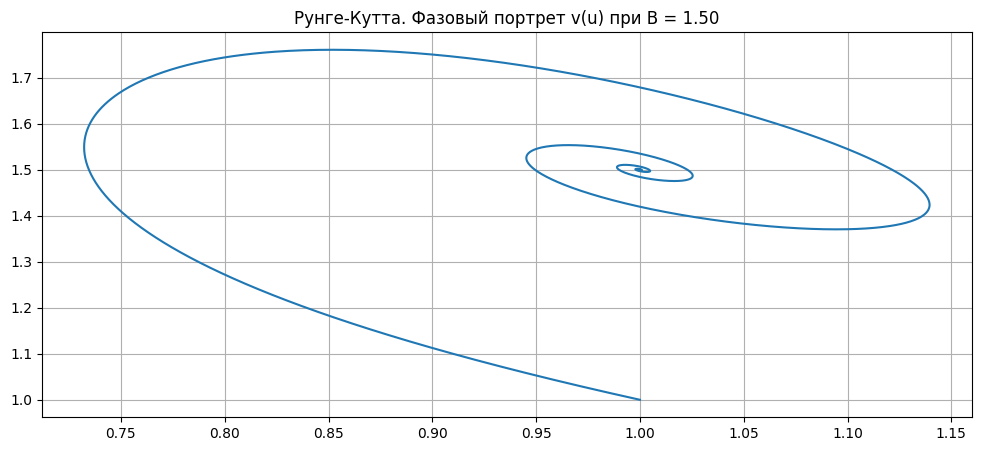

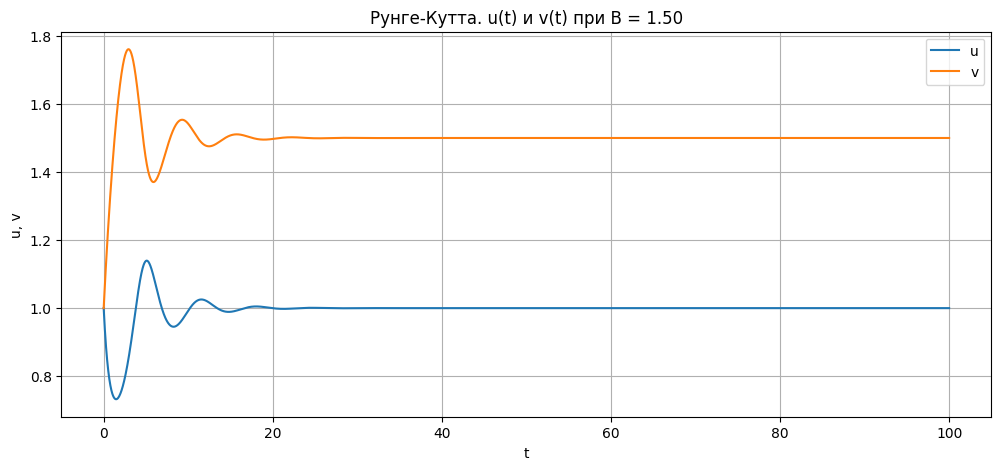

In [49]:
B_GLOBAL = 1.5

solution_arr, t_arr = BrusselatorSolutionsRK(N = N, h = h)
solution_arr_transposed = np.array(solution_arr).transpose()
ShowPlotsRK(solution_arr_transposed[0], solution_arr_transposed[1], t_arr)

### B = 2

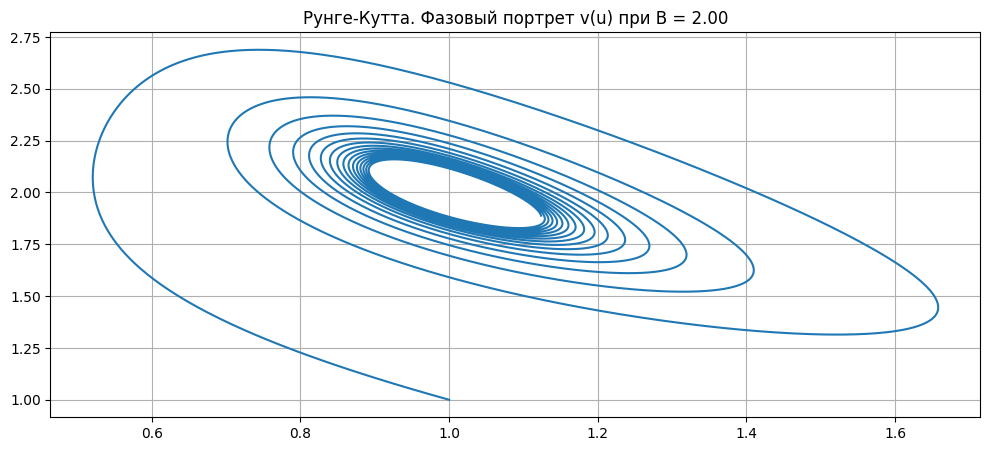

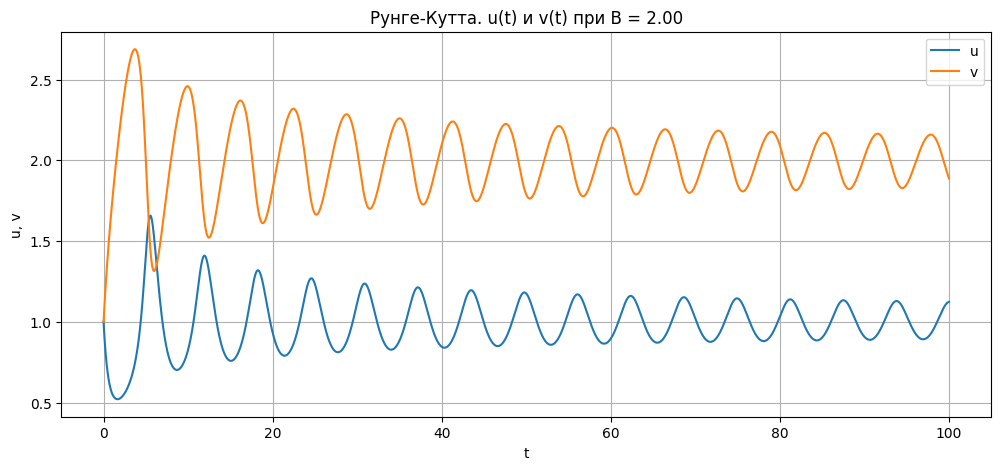

In [50]:
B_GLOBAL = 2

solution_arr, t_arr = BrusselatorSolutionsRK(N = N, h = h)
solution_arr_transposed = np.array(solution_arr).transpose()
ShowPlotsRK(solution_arr_transposed[0], solution_arr_transposed[1], t_arr)

### B = 3

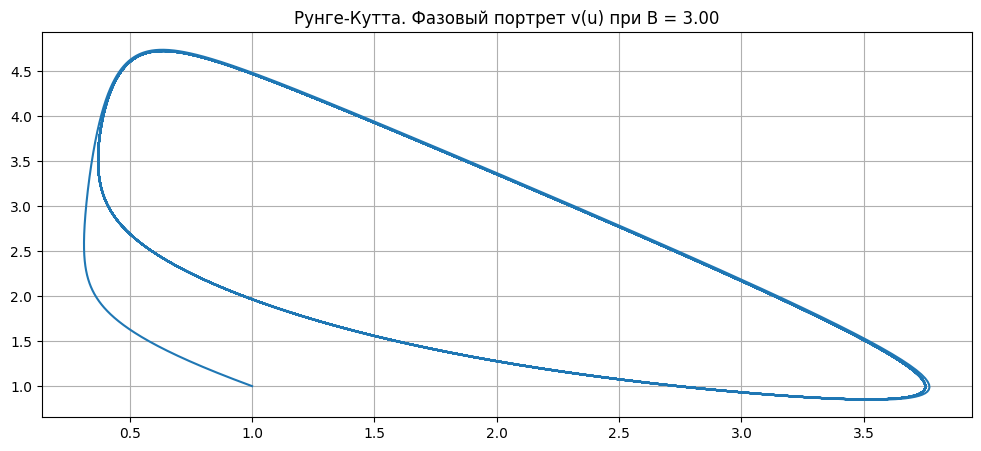

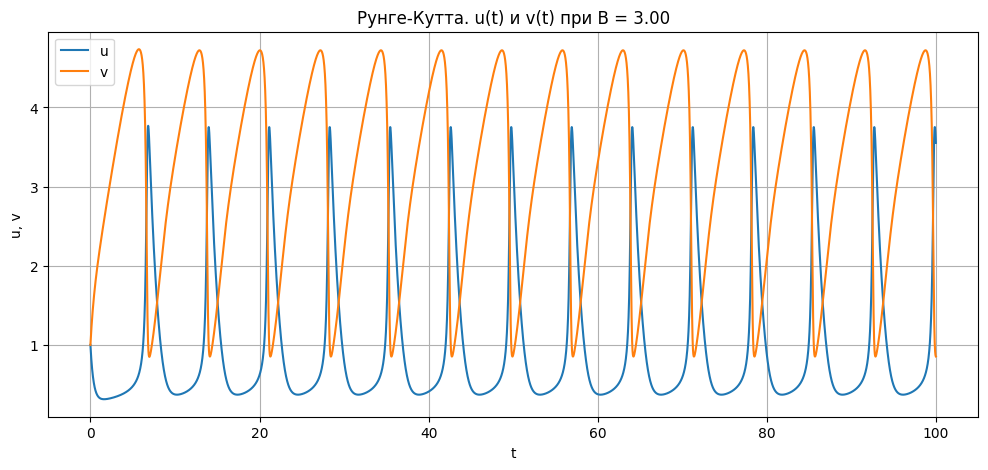

In [51]:
B_GLOBAL = 3

solution_arr, t_arr = BrusselatorSolutionsRK(N = N, h = h)
solution_arr_transposed = np.array(solution_arr).transpose()
ShowPlotsRK(solution_arr_transposed[0], solution_arr_transposed[1], t_arr)

### B = 4

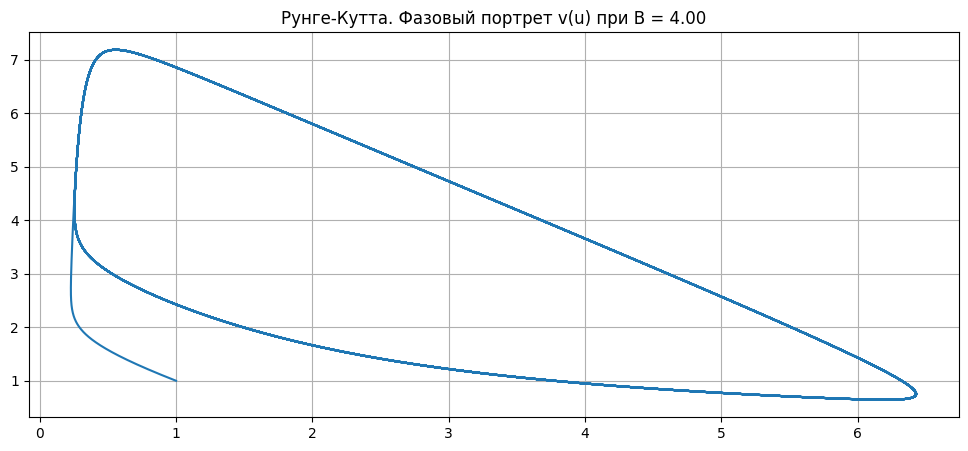

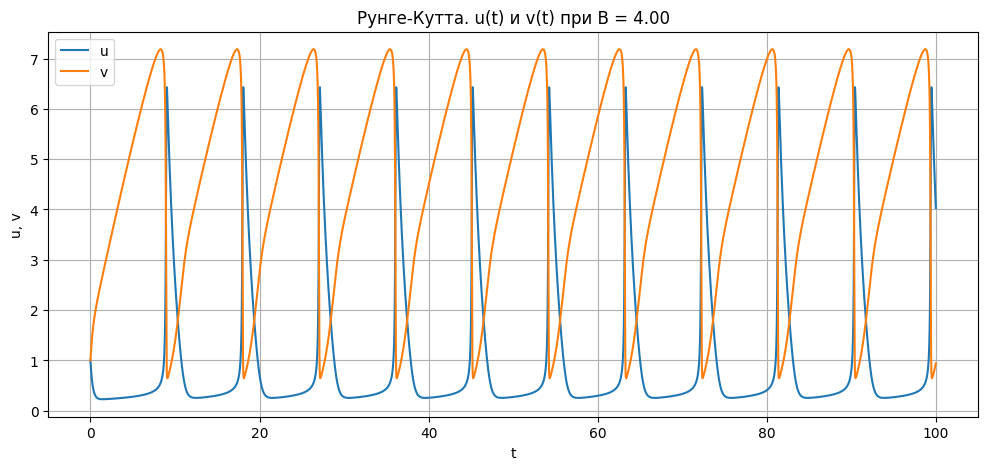

In [52]:
B_GLOBAL = 4

solution_arr, t_arr = BrusselatorSolutionsRK(N = N, h = h)
solution_arr_transposed = np.array(solution_arr).transpose()
ShowPlotsRK(solution_arr_transposed[0], solution_arr_transposed[1], t_arr)

### B = 5

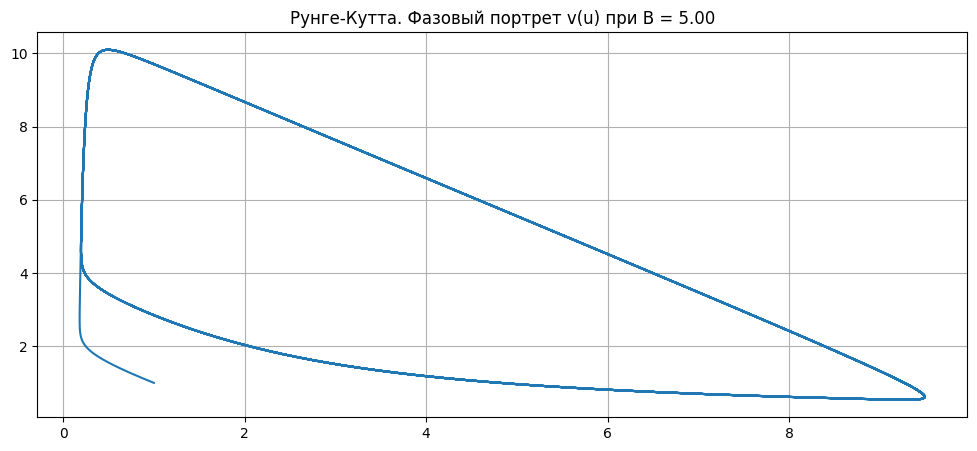

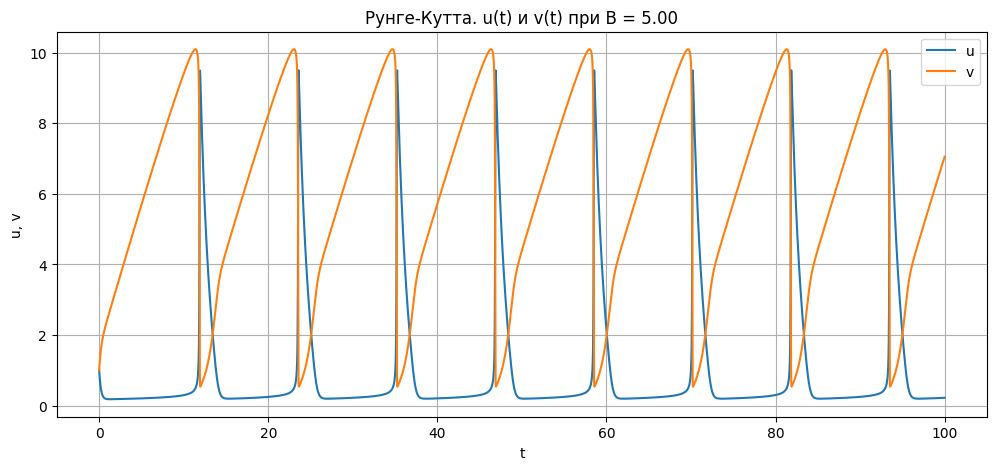

In [53]:
B_GLOBAL = 5

solution_arr, t_arr = BrusselatorSolutionsRK(N = N, h = h)
solution_arr_transposed = np.array(solution_arr).transpose()
ShowPlotsRK(solution_arr_transposed[0], solution_arr_transposed[1], t_arr)

## Графики для метода Адамса

### B = 1.5

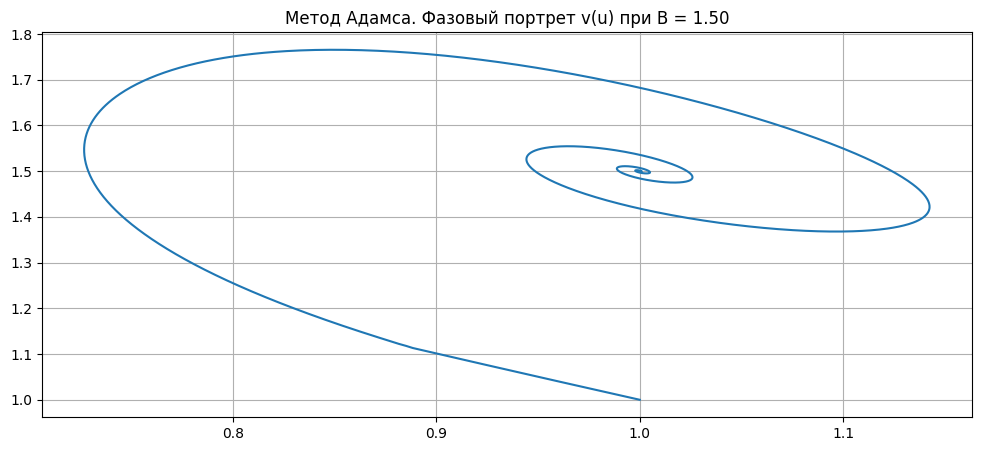

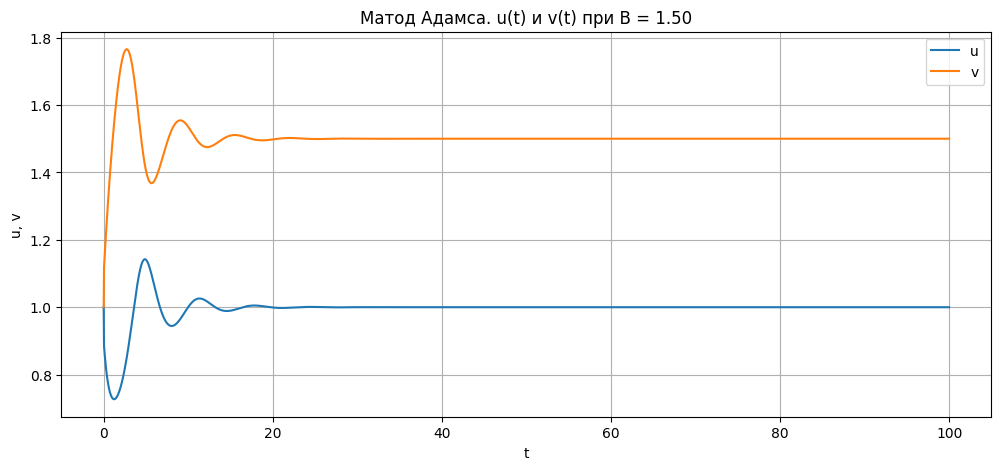

In [54]:
B_GLOBAL = 1.5

solution_arr, t_arr = BrusselatorSolutionsAdams(t_arr[0:4], solution_arr[0:4], N = N, h = h)
solution_arr_transposed = np.array(solution_arr).transpose()
ShowPlotsAdams(solution_arr_transposed[0], solution_arr_transposed[1], t_arr)

### B = 2

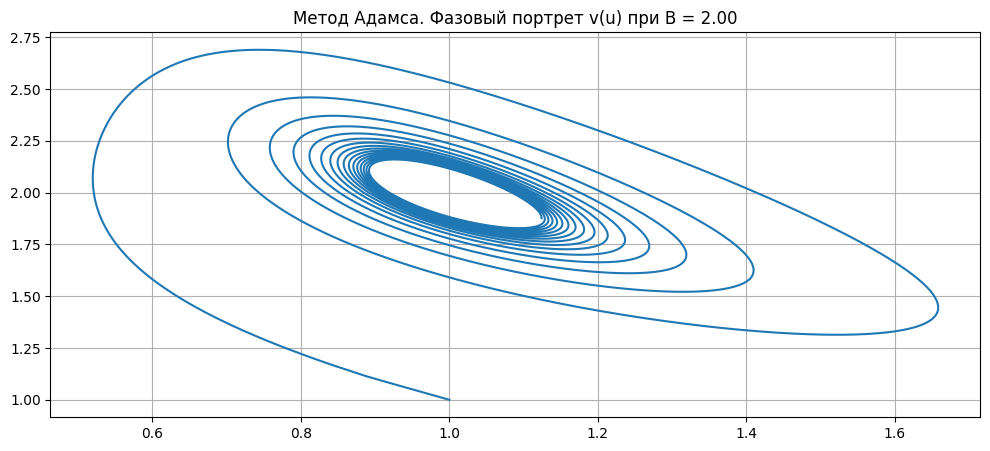

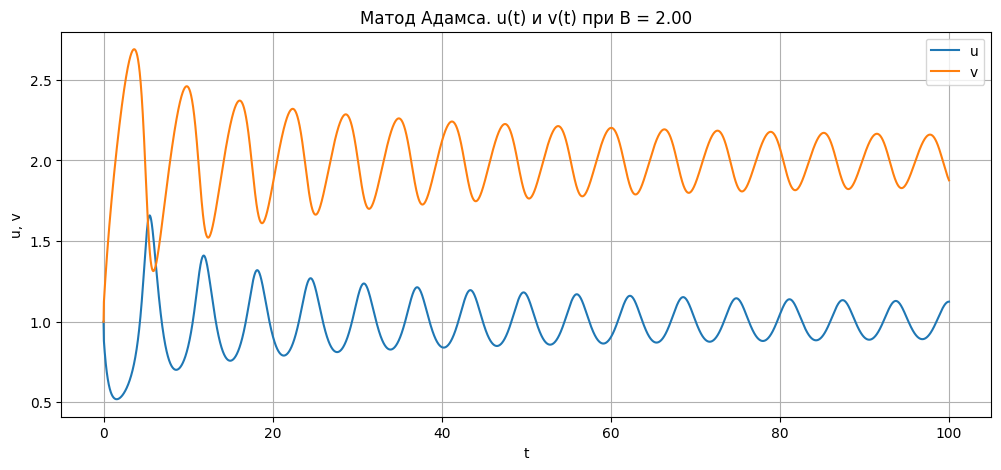

In [55]:
B_GLOBAL = 2

solution_arr, t_arr = BrusselatorSolutionsAdams(t_arr[0:4], solution_arr[0:4], N = N, h = h)
solution_arr_transposed = np.array(solution_arr).transpose()
ShowPlotsAdams(solution_arr_transposed[0], solution_arr_transposed[1], t_arr)

### B = 3

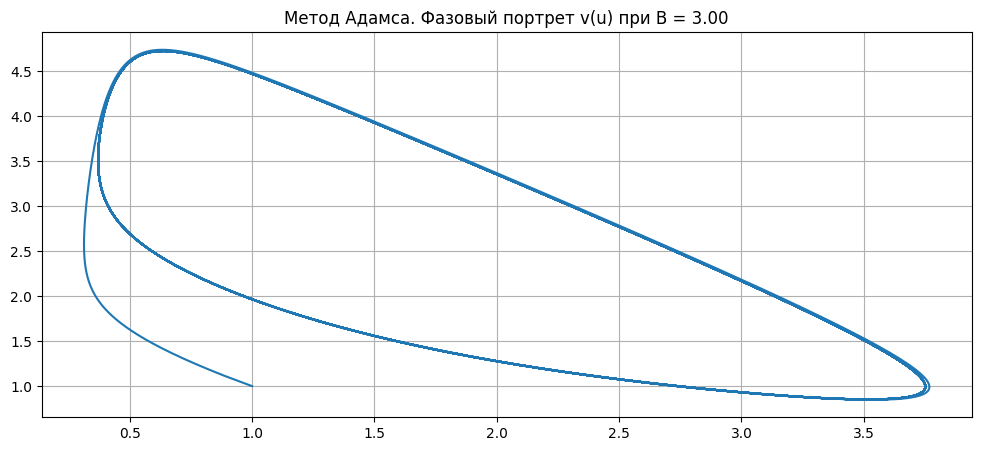

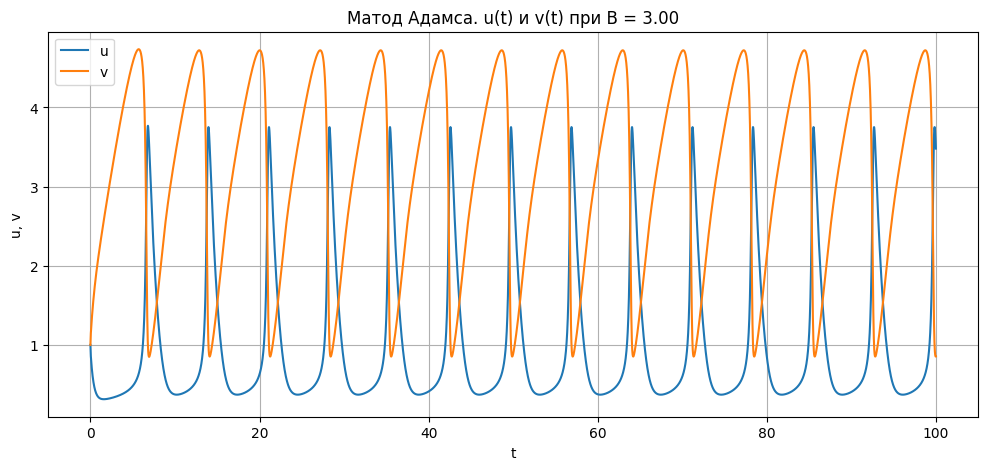

In [56]:
B_GLOBAL = 3

solution_arr, t_arr = BrusselatorSolutionsAdams(t_arr[0:4], solution_arr[0:4], N = N, h = h)
solution_arr_transposed = np.array(solution_arr).transpose()
ShowPlotsAdams(solution_arr_transposed[0], solution_arr_transposed[1], t_arr)

### B = 4

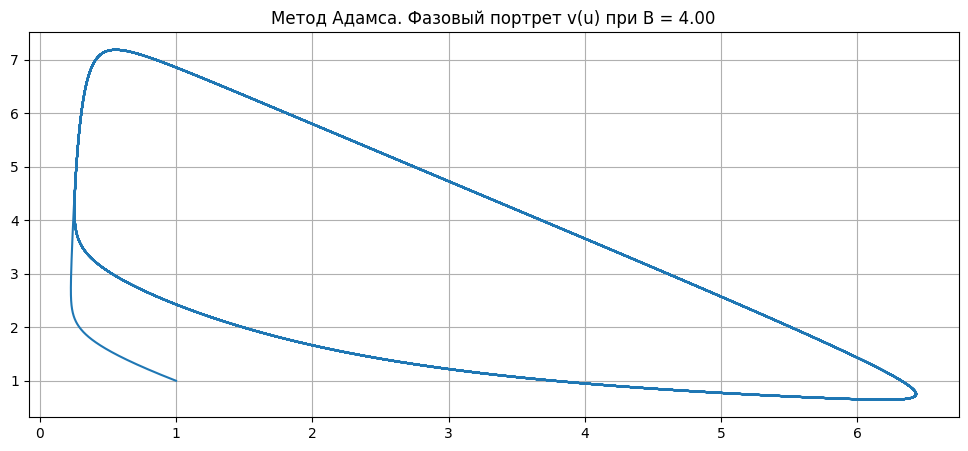

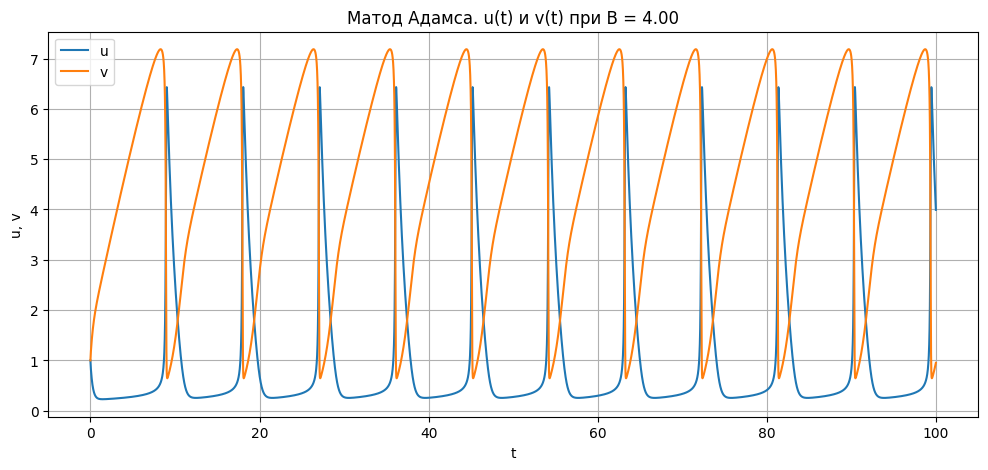

In [62]:
B_GLOBAL = 4

solution_arr, t_arr = BrusselatorSolutionsAdams(t_arr[0:4], solution_arr[0:4], N = N, h = h)
solution_arr_transposed = np.array(solution_arr).transpose()
ShowPlotsAdams(solution_arr_transposed[0], solution_arr_transposed[1], t_arr)